# 1. Reduce dimension:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

TRAIN_CSV = '/home/jovyan/data/autoencoder/autoencoder_train_spout.csv'
TEST_CSV = '/home/jovyan/data/autoencoder/autoencoder_test_all.csv'

In [3]:
df_train = pd.read_csv(TRAIN_CSV)
print(f'Train length: {len(df_train)}')
df_test = pd.read_csv(TEST_CSV)
print(f'Test length: {len(df_test)}')
df = pd.concat([df_train, df_test], ignore_index=True)
df.reset_index()
df

Train length: 15762
Test length: 22003


ID                                    uniprotSequence  \
0      A0A7V0X145  MTHRKKKATSANVAKETKSAMASLMAKAGFNLSDEQLERFWAFYGL...   
1      A0A0C9ZSZ6  METESARTEAEGEQATPTQGLSKRAQKRAAKAARLHELKLERRARE...   
2      A0A554VM47  MIDIKLLEYLESFLTPRRQYLNKKVLDNRTNYFTVAVEDVYQLHNT...   
3      A0A657ANE6  MNLLLLFPENMHSETLAEISGRQLEHMHETLKSKVGDNIRVGLLNQ...   
4      A0A0T1X4T1  MSKDDTGDRQAKDTHYATLRRAHRDARRERGEIPTPVQDKRKKSAS...   
...           ...                                                ...   
37760      I3N0R8  MSLGVRPPELPADPARGKMAASRWRSLSDQGLALASGPAKQALAGS...   
37761  A0A6P8NBY7  MNDNQEIVYNIVKDLHITSVSLIIIEIYPAVFNMYTGLQKFLPNYS...   
37762  A0A6P7K416  MFPSPAQCLKTAAPLLPQIGFPKDLRRLSAHGGASRLQARRHFGVS...   
37763  A0A0N5ALC7  MKRRLLHLPPKCFRFHFAALSSNSKELPKNFKPQRPPHYRSTHPYV...   
37764  A0A401SRU9  MWCGASHVRAVNLVPALSGCRTLHVAAGLSAQAQRPHKMPEPVEIP...   

      Max_Topology  Max Freq   Knot Core  knot               FamilyName  \
0              3_1     0.862  (436, 474)     1                    SPOUT   
1              3_1     0.974  (205, 251)     1                    SPOUT   
2              3_1     0.900  (108, 151)     1                    SPOUT   
3              NaN       NaN         NaN     0                    SPOUT   
4              3_1     0.866  (221, 262)     1                    SPOUT   
...            ...       ...         ...   ...                      ...   
37760          3_1     0.492  (138, 446)     1  ribosomal-mitochondrial   
37761          3_1     0.746  (117, 460)     1  ribosomal-mitochondrial   
37762          3_1     0.526  (118, 430)     1  ribosomal-mitochondrial   
37763          3_1     0.572  (120, 473)     1  ribosomal-mitochondrial   
37764          3_1     0.548   (99, 408)     1  ribosomal-mitochondrial   

          feat0     feat1     feat2  ...  feat2552  feat2553  feat2554  \
0     -0.045006  0.006781 -0.020413  ...  0.036502  0.026766 -0.026291   
1     -0.011986  0.020817 -0.012554  ...  0.035468  0.001378 -0.029963   
2      0.003529 -0.010060  0.062379  ...  0.044333 -0.076826  0.042368   
3     -0.021246  0.007482  0.073753  ...  0.027593  0.019901  0.148839   
4      0.001998 -0.049015  0.061048  ...  0.071419 -0.011613  0.057665   
...         ...       ...       ...  ...       ...       ...       ...   
37760  0.029356 -0.067555  0.002454  ...  0.097633  0.018014 -0.017579   
37761  0.030820 -0.027513 -0.002596  ...  0.093169  0.017810 -0.000953   
37762  0.021318 -0.070928  0.007903  ...  0.112922  0.013103 -0.024364   
37763 -0.001495 -0.018062 -0.014321  ...  0.111988  0.053012 -0.049596   
37764  0.043193 -0.056966  0.012527  ...  0.118781  0.033601 -0.041454   

       feat2555  feat2556  feat2557  feat2558  feat2559  label  manual  
0     -0.149969  0.061229  0.078845 -0.040285 -0.035073      0     0.0  
1     -0.028210  0.003874 -0.001661 -0.044563 -0.031183      0     0.0  
2     -0.064360  0.018291 -0.008110 -0.011123 -0.006587      0     0.0  
3     -0.008864 -0.057352  0.068949 -0.062019 -0.058191      0     0.0  
4     -0.051804  0.020520  0.002087  0.059203  0.028096      0     0.0  
...         ...       ...       ...       ...       ...    ...     ...  
37760 -0.022196 -0.061860  0.026059 -0.021669 -0.017539      1     NaN  
37761 -0.019131 -0.058892 -0.014921 -0.038486  0.031598      1     NaN  
37762 -0.023012 -0.048379  0.013980 -0.040376  0.006380      1     NaN  
37763  0.004608 -0.066736 -0.008208 -0.001899  0.030571      1     NaN  
37764 -0.016735 -0.049729  0.008436 -0.026739  0.029233      1     NaN  

[37765 rows x 2569 columns]

In [17]:
families = list(df['FamilyName'].unique())
families

['SPOUT',
 'AdoMet synthase',
 'membrane',
 'VIT',
 'DUF',
 'biosynthesis of lantibiotics',
 'ATCase/OTCase',
 'TDD',
 'Carbonic anhydrase',
 'UCH',
 'ribosomal-mitochondrial']

In [4]:
X_df = df[[f'feat{i}' for i in range(2560)]].copy()
Y_df = df[['label']].copy()

### Standardize & normalize:

In [5]:
from sklearn import preprocessing

def standardize(embeddings):
    standard_scaler = preprocessing.StandardScaler(copy=True)
    return standard_scaler.fit_transform(embeddings)

def normalize(embeddings):
    min_max_scaler = preprocessing.MinMaxScaler()
    embeddings_scaled = min_max_scaler.fit_transform(embeddings)
    return pd.DataFrame(embeddings_scaled)

In [22]:
X_norm = normalize(standardize(X_df))
X_norm

0         1         2         3         4         5         6     \
0      0.413257  0.478038  0.411606  0.615480  0.503290  0.586006  0.466184   
1      0.509969  0.523117  0.440058  0.810595  0.446878  0.631780  0.521053   
2      0.555411  0.423951  0.711364  0.571536  0.593940  0.710971  0.375309   
3      0.482847  0.480289  0.752543  0.636109  0.588997  0.578178  0.636502   
4      0.550927  0.298845  0.706542  0.654544  0.564716  0.763903  0.274409   
...         ...       ...       ...       ...       ...       ...       ...   
37760  0.631058  0.239302  0.494397  0.450136  0.614265  0.514296  0.553801   
37761  0.635344  0.367900  0.476114  0.543723  0.668544  0.593512  0.696623   
37762  0.607514  0.228468  0.514126  0.482187  0.626623  0.576274  0.598128   
37763  0.540696  0.398254  0.433662  0.549448  0.645953  0.571744  0.693038   
37764  0.671584  0.273310  0.530868  0.520980  0.647672  0.585353  0.614299   

           7         8         9     ...      2550      2551      2552  \
0      0.604509  0.340960  0.518547  ...  0.276744  0.491804  0.443761   
1      0.637703  0.531931  0.578021  ...  0.440060  0.451932  0.440212   
2      0.555023  0.493079  0.529241  ...  0.383181  0.613419  0.470623   
3      0.607555  0.428218  0.578210  ...  0.415247  0.611261  0.413201   
4      0.449797  0.646999  0.573820  ...  0.337201  0.422452  0.563533   
...         ...       ...       ...  ...       ...       ...       ...   
37760  0.747570  0.459737  0.837261  ...  0.494180  0.525296  0.653453   
37761  0.705895  0.374394  0.826539  ...  0.450944  0.580728  0.638141   
37762  0.735299  0.471989  0.851350  ...  0.456690  0.548832  0.705896   
37763  0.726545  0.335099  0.687416  ...  0.376514  0.589917  0.702694   
37764  0.688190  0.468579  0.897417  ...  0.438031  0.588450  0.725994   

           2553      2554      2555      2556      2557      2558      2559  
0      0.697632  0.314071  0.116308  0.744936  0.570285  0.515721  0.642282  
1      0.606630  0.305068  0.534840  0.560819  0.310484  0.504930  0.651847  
2      0.326309  0.482431  0.410580  0.607100  0.289671  0.589283  0.712308  
3      0.673024  0.743509  0.601341  0.364279  0.538349  0.460896  0.585456  
4      0.560065  0.519941  0.453738  0.614256  0.322578  0.766682  0.797566  
...         ...       ...       ...       ...       ...       ...       ...  
37760  0.666261  0.335434  0.555513  0.349809  0.399938  0.562680  0.685386  
37761  0.665531  0.376203  0.566048  0.359334  0.267693  0.520259  0.806175  
37762  0.648658  0.318798  0.552711  0.393082  0.360960  0.515491  0.744184  
37763  0.791713  0.256925  0.647651  0.334154  0.289355  0.612552  0.803649  
37764  0.722132  0.276891  0.574284  0.388751  0.343067  0.549891  0.800361  

[37765 rows x 2560 columns]

# Clustering:

## K-Means

### Raw

In [194]:
from datetime import datetime
from sklearn.cluster import KMeans

def kmeans(X_input, iterations=25):
    # Choose optimal K using Elbow method
    score = []
    inertia = []
    computed_clusters = []
    computed_clusters_fitted = []

    print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
    for cluster in range(1, iterations):
        try:
            km = KMeans(
                n_clusters=cluster, init='random',
                n_init=10, max_iter=300, 
                tol=1e-04, random_state=0
            )
            km_fitted = km.fit(X_input)
            y_km = km.fit_predict(X_input)
            computed_clusters.append(km)
            computed_clusters_fitted.append(km_fitted)
            score.append(km.score(X_input))
            inertia.append(km.inertia_)
            print('Cluster initiation: {:2} ({})'.format(cluster, datetime.now().strftime("%H:%M:%S")))
        except:
            print('Exception.')
            continue
    print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')
    return score, inertia, computed_clusters, computed_clusters_fitted

score_raw, inertia_raw, computed_clusters_raw, computed_clusters_fitted_raw = kmeans(X_norm)

In [8]:
# !pip install plotnine

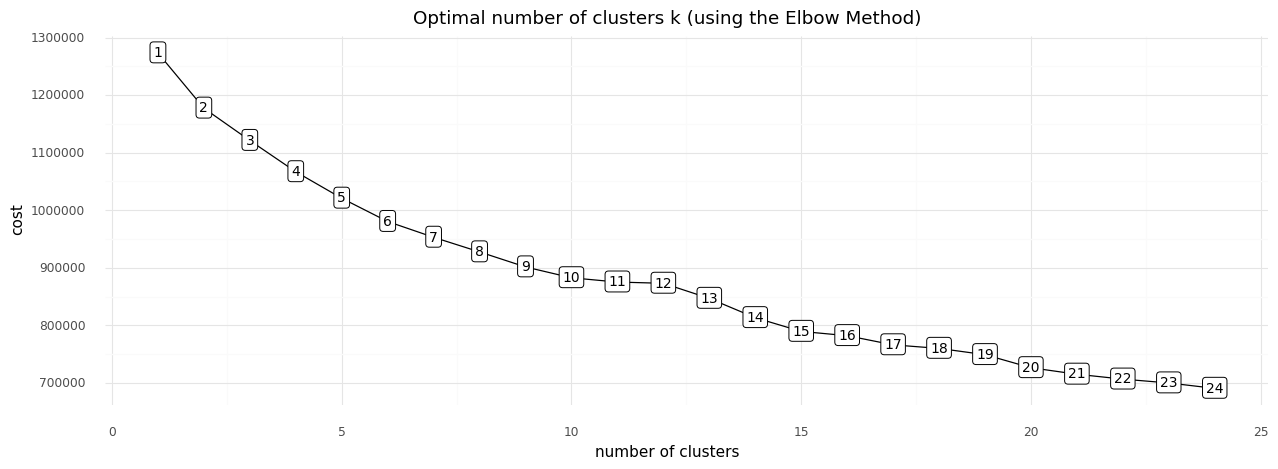

<ggplot: (8735186534774)>

In [9]:
from plotnine import *
import plotnine

df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters_raw) + 1), 'Cost': inertia_raw})
plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [132]:
kmeans_raw = computed_clusters_raw[10]

In [133]:
def add_clusters(X_results, y_kmeans):
    # add cluster labels to original dataframe
    X_tmp = X_results.copy()
    X_tmp['cluster'] = y_kmeans.labels_
    X_tmp['cluster'] = X_tmp.apply(lambda row: str(int(row['cluster'])), axis=1)
    X_tmp['FamilyName'] = df['FamilyName']
    return X_tmp

raw_results = add_clusters(X_norm, kmeans_raw)
raw_results

0         1         2         3         4         5         6  \
0      0.413257  0.478038  0.411606  0.615480  0.503290  0.586006  0.466184   
1      0.509969  0.523117  0.440058  0.810595  0.446878  0.631780  0.521053   
2      0.555411  0.423951  0.711364  0.571536  0.593940  0.710971  0.375309   
3      0.482847  0.480289  0.752543  0.636109  0.588997  0.578178  0.636502   
4      0.550927  0.298845  0.706542  0.654544  0.564716  0.763903  0.274409   
...         ...       ...       ...       ...       ...       ...       ...   
37760  0.631058  0.239302  0.494397  0.450136  0.614265  0.514296  0.553801   
37761  0.635344  0.367900  0.476114  0.543723  0.668544  0.593512  0.696623   
37762  0.607514  0.228468  0.514126  0.482187  0.626623  0.576274  0.598128   
37763  0.540696  0.398254  0.433662  0.549448  0.645953  0.571744  0.693038   
37764  0.671584  0.273310  0.530868  0.520980  0.647672  0.585353  0.614299   

              7         8         9  ...      2552      2553      2554  \
0      0.604509  0.340960  0.518547  ...  0.443761  0.697632  0.314071   
1      0.637703  0.531931  0.578021  ...  0.440212  0.606630  0.305068   
2      0.555023  0.493079  0.529241  ...  0.470623  0.326309  0.482431   
3      0.607555  0.428218  0.578210  ...  0.413201  0.673024  0.743509   
4      0.449797  0.646999  0.573820  ...  0.563533  0.560065  0.519941   
...         ...       ...       ...  ...       ...       ...       ...   
37760  0.747570  0.459737  0.837261  ...  0.653453  0.666261  0.335434   
37761  0.705895  0.374394  0.826539  ...  0.638141  0.665531  0.376203   
37762  0.735299  0.471989  0.851350  ...  0.705896  0.648658  0.318798   
37763  0.726545  0.335099  0.687416  ...  0.702694  0.791713  0.256925   
37764  0.688190  0.468579  0.897417  ...  0.725994  0.722132  0.276891   

           2555      2556      2557      2558      2559  cluster  \
0      0.116308  0.744936  0.570285  0.515721  0.642282        6   
1      0.534840  0.560819  0.310484  0.504930  0.651847        3   
2      0.410580  0.607100  0.289671  0.589283  0.712308        6   
3      0.601341  0.364279  0.538349  0.460896  0.585456        3   
4      0.453738  0.614256  0.322578  0.766682  0.797566        6   
...         ...       ...       ...       ...       ...      ...   
37760  0.555513  0.349809  0.399938  0.562680  0.685386        5   
37761  0.566048  0.359334  0.267693  0.520259  0.806175        1   
37762  0.552711  0.393082  0.360960  0.515491  0.744184        5   
37763  0.647651  0.334154  0.289355  0.612552  0.803649        1   
37764  0.574284  0.388751  0.343067  0.549891  0.800361        5   

                    FamilyName  
0                        SPOUT  
1                        SPOUT  
2                        SPOUT  
3                        SPOUT  
4                        SPOUT  
...                        ...  
37760  ribosomal-mitochondrial  
37761  ribosomal-mitochondrial  
37762  ribosomal-mitochondrial  
37763  ribosomal-mitochondrial  
37764  ribosomal-mitochondrial  

[37765 rows x 2562 columns]

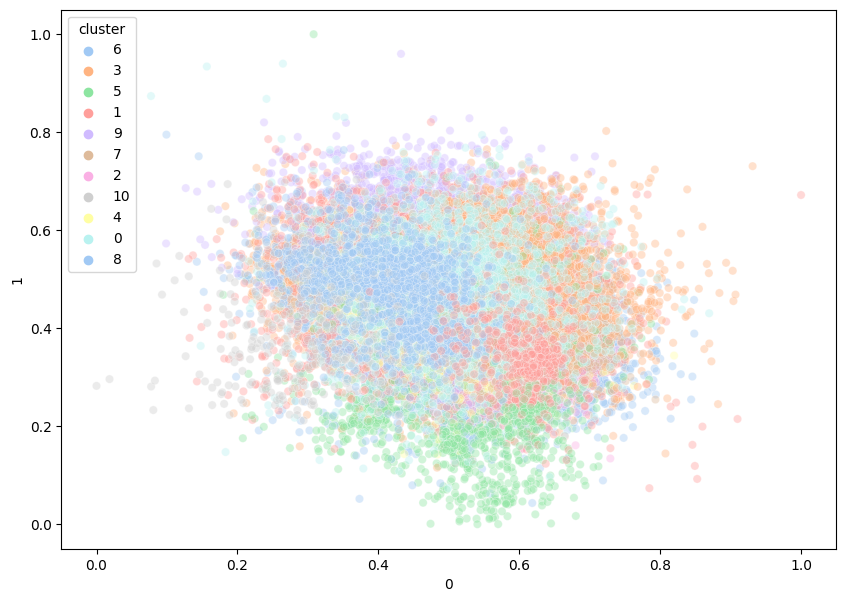

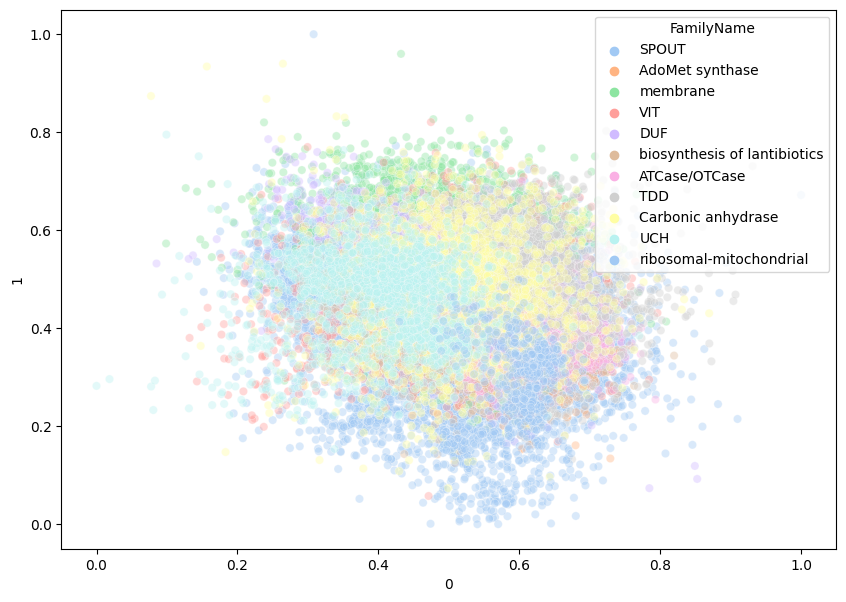

In [134]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import seaborn as sns
import numpy as np

def visualize_clusters(df_orig, X_results, hue):
    plt.rcParams['figure.figsize'] = (10,7)
    sns.scatterplot(
        x=0, 
        y=1,
        palette='pastel',
        hue=hue,
        data=X_results,
        alpha=0.4
    )
    plt.show()

    
visualize_clusters(df, raw_results, 'cluster')
visualize_clusters(df, raw_results, 'FamilyName')

In [135]:
raw_results.loc[raw_results['cluster'] == '0']['FamilyName'].value_counts()

Carbonic anhydrase    1905
Name: FamilyName, dtype: int64

In [136]:
def get_cluster_family_stats(X_results):
    cluster_names = list(X_results['cluster'].unique())
    stats = []

    for cluster_name in cluster_names:
        family_counts = X_results.loc[X_results['cluster'] == cluster_name]['FamilyName'].value_counts()
        cluster_stats = {'cluster': cluster_name}
        
        for family in families:
            family_count = family_counts[family] if family in family_counts else 0
            cluster_stats = {**cluster_stats, **{family: family_count}}
            
        stats.append(cluster_stats)

    return stats
        
raw_stats = pd.DataFrame(get_cluster_family_stats(raw_results))
raw_stats

cluster  SPOUT  AdoMet synthase  membrane   VIT   DUF  \
0        6  10473                0         0     0     0   
1        3   8084                0         0     0     0   
2        5   1035                0        57   112     0   
3        1    107                5        57  1886  1999   
4        9      3                0      1886     0     0   
5        7      1                0         0     0     0   
6        2      0             1995         0     0     0   
7       10      0                0         0     2     1   
8        4      0                0         0     0     0   
9        0      0                0         0     0     0   
10       8      0                0         0     0     0   

    biosynthesis of lantibiotics  ATCase/OTCase   TDD  Carbonic anhydrase  \
0                              0              0     0                   0   
1                              0              0  1618                   0   
2                              0              0   361                  11   
3                             19              2    21                  84   
4                              0              0     0                   0   
5                              0           1998     0                   0   
6                              0              0     0                   0   
7                              0              0     0                   0   
8                           1470              0     0                   0   
9                              0              0     0                1905   
10                             0              0     0                   0   

     UCH  ribosomal-mitochondrial  
0      0                        0  
1      1                        0  
2      2                      258  
3     32                      405  
4      0                        0  
5      0                        0  
6      0                        0  
7    303                        0  
8      0                        0  
9      0                        0  
10  1572                        0

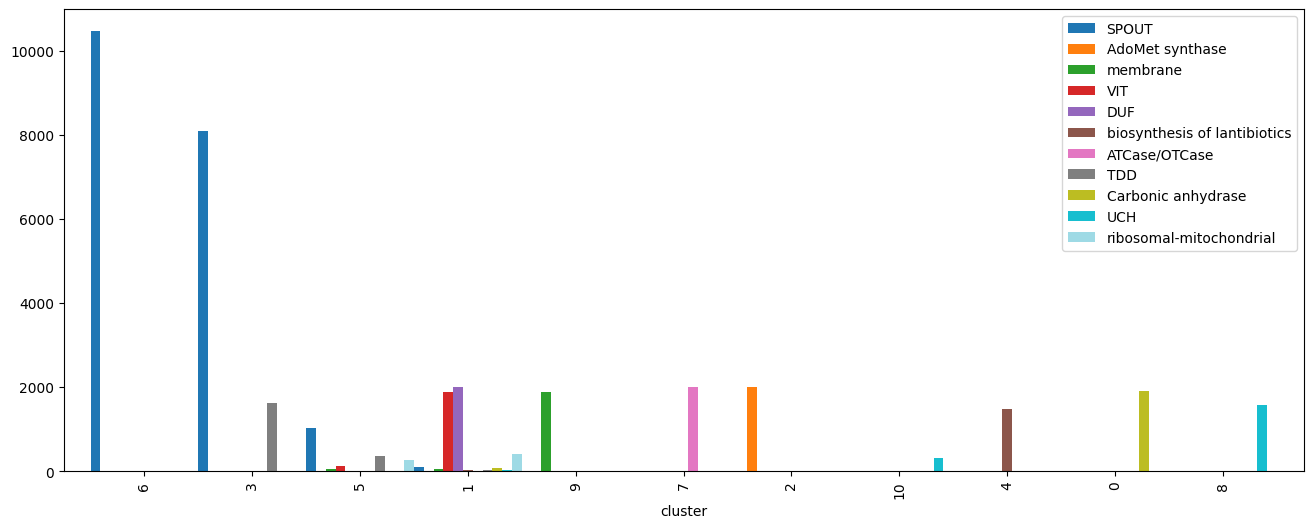

In [137]:
def visualise_cluster_family_stats(X_stats):
    plt.rcParams['figure.figsize'] = (16,6)
    X_stats.plot(x='cluster', y=families, kind='bar', colormap='tab20', width=1, align='center')
    plt.show()

visualise_cluster_family_stats(raw_stats)

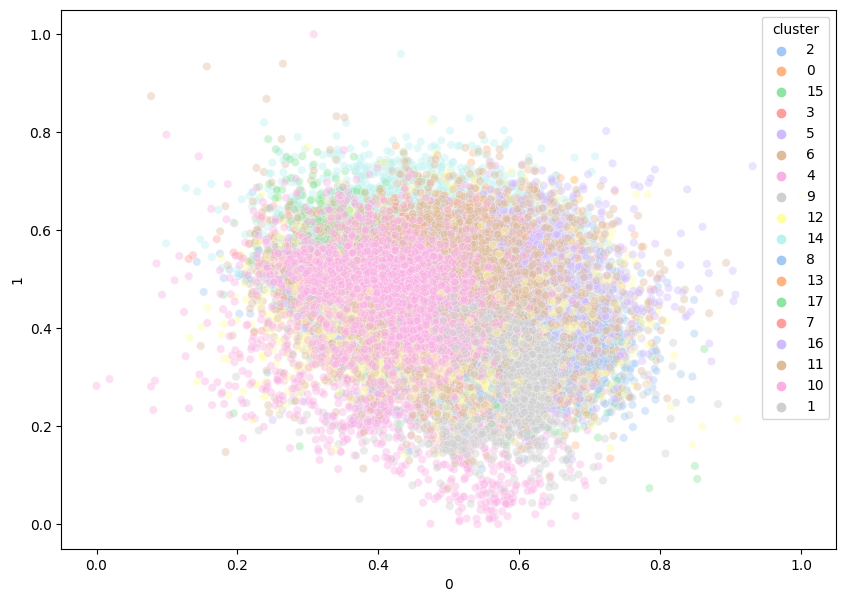

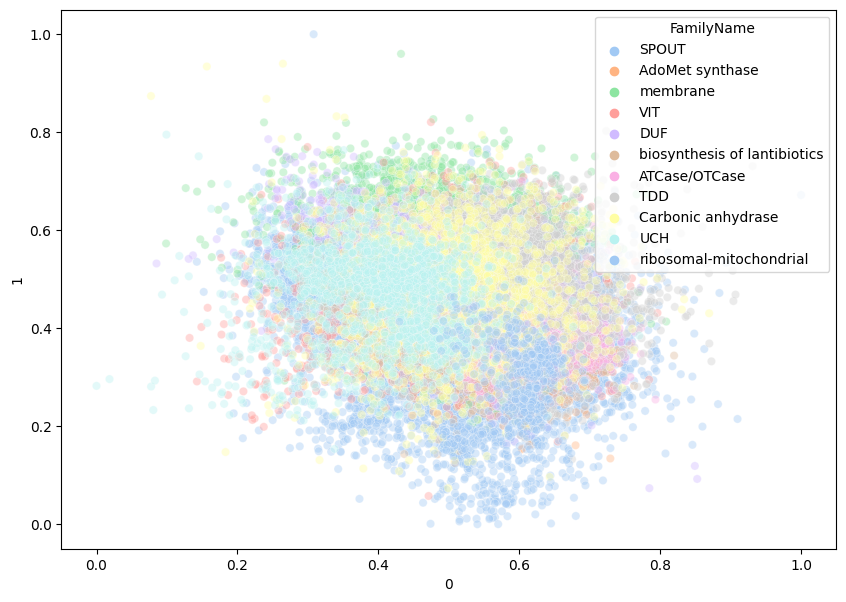

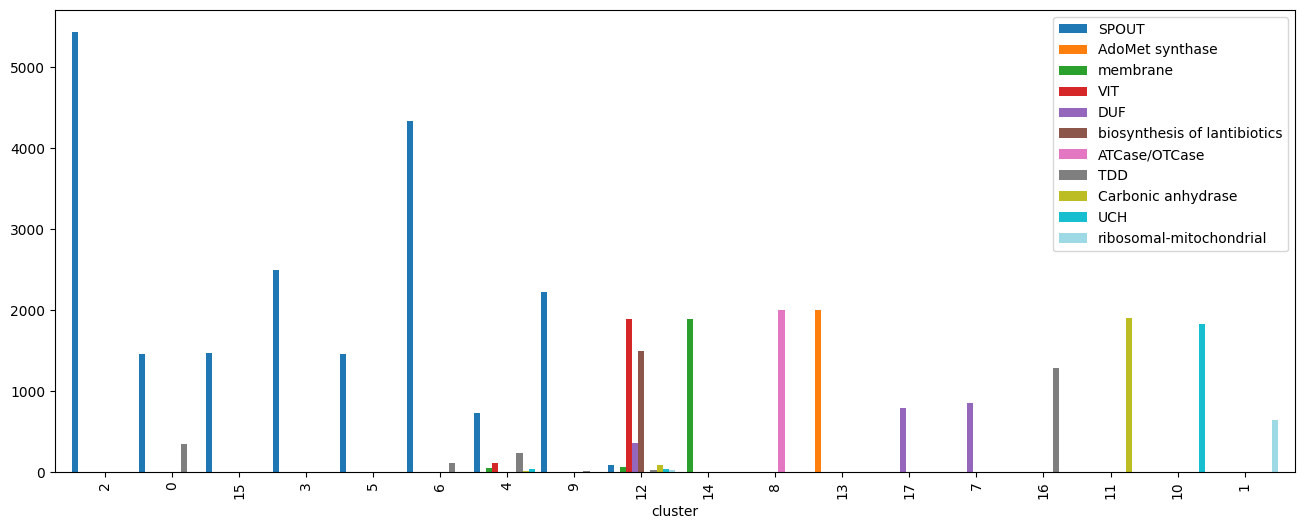

cluster  SPOUT  AdoMet synthase  membrane   VIT  DUF  \
0        2   5438                0         0     0    0   
1        0   1455                0         0     0    0   
2       15   1476                0         0     0    0   
3        3   2497                0         0     0    0   
4        5   1461                0         0     0    0   
5        6   4335                0         0     0    0   
6        4    723                0        48   106    1   
7        9   2224                0         0     0    0   
8       12     90                4        67  1894  352   
9       14      3                0      1885     0    0   
10       8      1                0         0     0    0   
11      13      0             1996         0     0    0   
12      17      0                0         0     0  790   
13       7      0                0         0     0  857   
14      16      0                0         0     0    0   
15      11      0                0         0     0    0   
16      10      0                0         0     0    0   
17       1      0                0         0     0    0   

    biosynthesis of lantibiotics  ATCase/OTCase   TDD  Carbonic anhydrase  \
0                              0              0     0                   0   
1                              0              0   344                   0   
2                              0              0     0                   0   
3                              0              0     0                   0   
4                              0              0     0                   0   
5                              0              0   109                   0   
6                              0              0   234                  13   
7                              0              0     6                   0   
8                           1489              2    23                  81   
9                              0              0     0                   0   
10                             0           1998     0                   0   
11                             0              0     0                   0   
12                             0              0     0                   0   
13                             0              0     0                   0   
14                             0              0  1284                   0   
15                             0              0     0                1906   
16                             0              0     0                   0   
17                             0              0     0                   0   

     UCH  ribosomal-mitochondrial  
0      0                        0  
1      0                        0  
2      0                        0  
3      0                        0  
4      0                        0  
5      0                        0  
6     40                        0  
7      0                        0  
8     37                       22  
9      0                        0  
10     0                        0  
11     0                        0  
12     0                        0  
13     0                        0  
14     0                        0  
15     0                        0  
16  1833                        0  
17     0                      641

In [181]:
# quick overview for finding the best K:

def display_clustering_results(orig_data, clusters, k, not_df=False):
    kmeans = clusters[k]
    if not_df:
        orig_data = pd.DataFrame(orig_data) 
    results = add_clusters(orig_data, kmeans)
    visualize_clusters(df, results, 'cluster')
    visualize_clusters(df, results, 'FamilyName')
    stats = pd.DataFrame(get_cluster_family_stats(results))
    visualise_cluster_family_stats(stats)
    return stats

display_clustering_results(X_norm, computed_clusters_raw, 17)
# 10 - SPOUT majorly in only 4 clusters
# 17 - probably the best division w.r.t. family

### PCA

In [151]:
from sklearn.decomposition import PCA

def compute_PCA(df_pca):
    pca = PCA(n_components=len(df_pca.columns), whiten=False, random_state=42)
    pca_X = pca.fit_transform(df_pca)
    pca_X = pd.DataFrame(data=pca_X)

    print(f'Variance Explained by all {len(df_pca.columns)} principal components: {sum(pca.explained_variance_ratio_)}\n')
    
    importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
    importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

    n_components = [150, 10, 7, 5, 2]

    for n in n_components:
        print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
    print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))
    
    return pca_X

pca_results = compute_PCA(X_norm)
pca_results = pca_results.iloc[:, :150]  # take the first 150 principal components
pca_results

Variance Explained by all 2560 principal components: 1.0000000000000013

Variance Captured by First 150 Principal Components: [0.91176266]
Variance Captured by First  10 Principal Components: [0.4795025]
Variance Captured by First   7 Principal Components: [0.41219868]
Variance Captured by First   5 Principal Components: [0.35858871]
Variance Captured by First   2 Principal Components: [0.25124002]
Variance Captured by the First Principal Component:  [0.152196]


0         1         2         3         4         5         6    \
0     -1.369181  0.053038 -0.979818 -0.977782  0.020833  0.371095 -0.690718   
1      0.270016  0.623605  1.620997  0.023170  1.515719  0.103437 -0.839408   
2     -1.751986  0.325382  1.018952 -0.045049 -0.450586 -0.342471  0.837761   
3     -1.122269 -0.097994  0.847559  0.138270 -0.924910  0.876320 -0.360288   
4     -2.793764 -0.031233 -1.179556  0.462332 -0.034692 -0.598282 -0.033130   
...         ...       ...       ...       ...       ...       ...       ...   
37760  1.931658  1.348597  1.629528  0.493891 -1.566682  0.803236 -1.729742   
37761  1.867344 -0.496914  1.007156 -0.423971 -0.708020 -0.071209 -1.371190   
37762  1.968792  0.984108  1.432947  0.311998 -1.445173  0.649752 -1.871091   
37763  1.724991 -0.770767  0.288728 -0.957311 -0.188210 -0.197680 -1.820897   
37764  1.887784  0.033048  1.061486 -0.152750 -1.142778  0.428519 -1.947018   

            7         8         9    ...       140       141       142  \
0      0.403724  0.195219  0.649530  ...  0.148727  0.024996  0.104945   
1     -1.211881  0.083170 -1.351116  ... -0.024873  0.007096  0.022979   
2      1.515373 -0.808995  0.748008  ...  0.099562  0.098361  0.163786   
3      1.425309 -2.157619  0.268557  ...  0.046113 -0.179600  0.209840   
4      0.218674 -0.703332 -0.904511  ...  0.092177  0.020201  0.042366   
...         ...       ...       ...  ...       ...       ...       ...   
37760  0.625607  0.732019 -0.760136  ... -0.147854  0.026193 -0.000519   
37761  1.000227 -0.338975 -0.823390  ...  0.111633 -0.007426  0.003223   
37762  0.732611  0.616421 -0.726964  ... -0.200216  0.046464 -0.095172   
37763  0.629698 -0.169894 -0.954521  ...  0.094217 -0.030875  0.093344   
37764  0.733683  0.062894 -0.724233  ... -0.101522  0.005741 -0.022945   

            143       144       145       146       147       148       149  
0      0.118128 -0.186506 -0.000922 -0.051123  0.151955  0.000626  0.068738  
1      0.046134  0.073879  0.080571 -0.006216  0.089983 -0.004630  0.130429  
2      0.186210  0.038476 -0.018006  0.038797  0.189459 -0.082090 -0.017304  
3      0.075949 -0.220172 -0.020010  0.052737 -0.166071 -0.065465 -0.469255  
4      0.047424 -0.045358 -0.030180 -0.050555 -0.130050 -0.008766  0.044449  
...         ...       ...       ...       ...       ...       ...       ...  
37760 -0.011069  0.083415 -0.167881 -0.020691 -0.309168 -0.240377 -0.077459  
37761 -0.018617  0.009743  0.132563 -0.004388 -0.007562  0.069859  0.036456  
37762 -0.062979  0.087500 -0.188233  0.013351 -0.310383 -0.159776  0.027979  
37763  0.032351  0.005301  0.028079 -0.134689  0.188228  0.103245  0.108111  
37764 -0.086615  0.141296 -0.093771 -0.053859 -0.229138 -0.143277 -0.042726  

[37765 rows x 150 columns]

In [152]:
score_pca, inertia_pca, computed_clusters_pca, computed_clusters_fitted_pca = kmeans(pca_results)

Start at 18:03:46.
Cluster initiation:  1 (18:03:47)
Cluster initiation:  2 (18:03:49)
Cluster initiation:  3 (18:03:50)
Cluster initiation:  4 (18:03:51)
Cluster initiation:  5 (18:03:54)
Cluster initiation:  6 (18:03:57)
Cluster initiation:  7 (18:03:59)
Cluster initiation:  8 (18:04:02)
Cluster initiation:  9 (18:04:04)
Cluster initiation: 10 (18:04:07)
Cluster initiation: 11 (18:04:10)
Cluster initiation: 12 (18:04:14)
Cluster initiation: 13 (18:04:16)
Cluster initiation: 14 (18:04:19)
Cluster initiation: 15 (18:04:23)
Cluster initiation: 16 (18:04:26)
Cluster initiation: 17 (18:04:30)
Cluster initiation: 18 (18:04:34)
Cluster initiation: 19 (18:04:37)
Cluster initiation: 20 (18:04:41)
Cluster initiation: 21 (18:04:45)
Cluster initiation: 22 (18:04:49)
Cluster initiation: 23 (18:04:53)
Cluster initiation: 24 (18:04:57)
Done at 18:04:57.


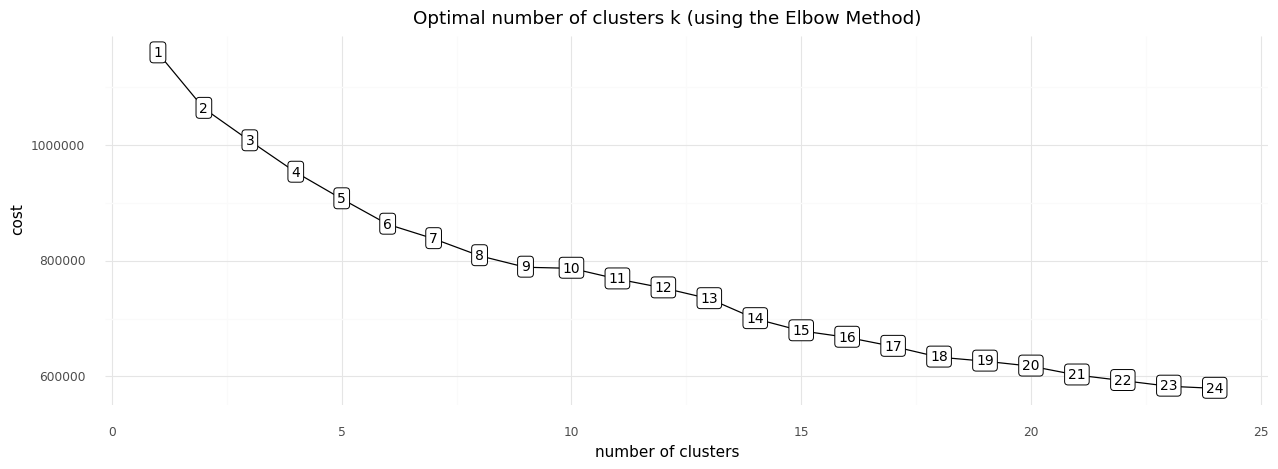

<ggplot: (8735139819593)>

In [153]:
from plotnine import *
import plotnine

df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters_pca) + 1), 'Cost': inertia_pca})
plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

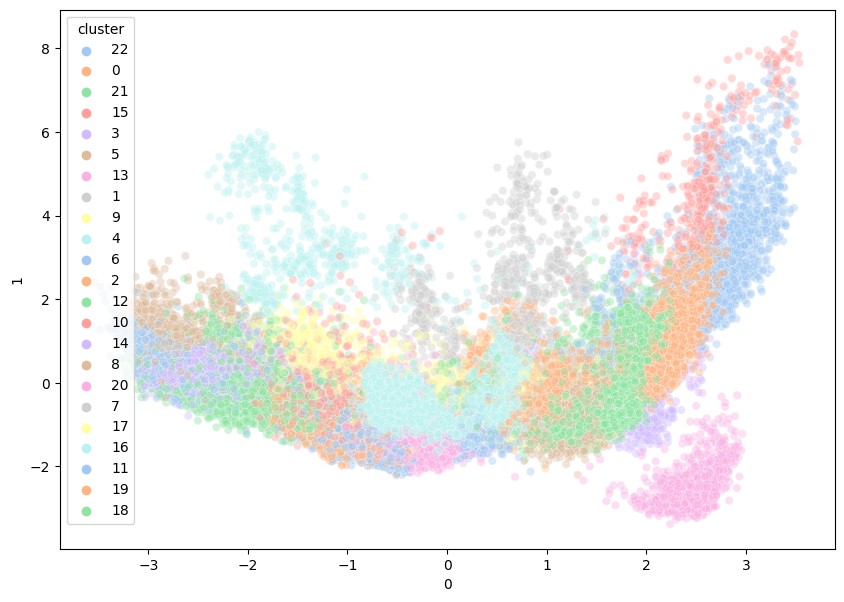

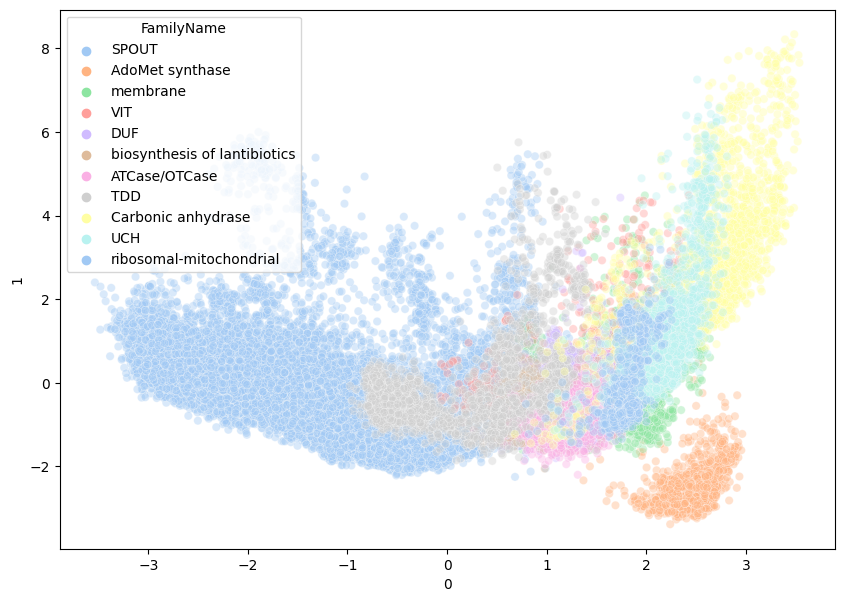

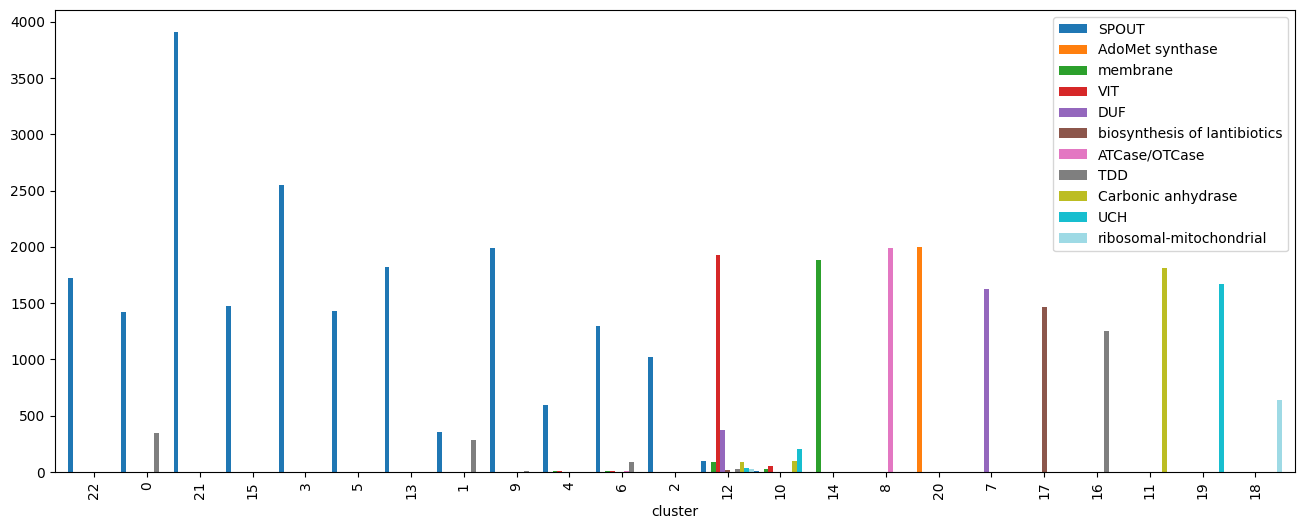

cluster  SPOUT  AdoMet synthase  membrane   VIT   DUF  \
0       22   1727                0         0     0     0   
1        0   1424                0         0     0     0   
2       21   3909                0         0     0     0   
3       15   1472                0         0     0     0   
4        3   2553                0         0     0     0   
5        5   1434                0         0     0     0   
6       13   1821                0         0     0     0   
7        1    356                0         0     4     0   
8        9   1991                0         0     0     0   
9        4    591                0         7    10     0   
10       6   1298                0         5     6     0   
11       2   1021                0         0     0     0   
12      12     96                4        85  1927   371   
13      10      6                0        24    53     1   
14      14      3                0      1879     0     0   
15       8      1                0         0     0     0   
16      20      0             1996         0     0     0   
17       7      0                0         0     0  1628   
18      17      0                0         0     0     0   
19      16      0                0         0     0     0   
20      11      0                0         0     0     0   
21      19      0                0         0     0     0   
22      18      0                0         0     0     0   

    biosynthesis of lantibiotics  ATCase/OTCase   TDD  Carbonic anhydrase  \
0                              0              0     0                   0   
1                              0              0   346                   0   
2                              0              0     0                   0   
3                              0              0     0                   0   
4                              0              0     0                   0   
5                              0              0     0                   0   
6                              0              0     2                   0   
7                              0              0   284                   1   
8                              0              0     6                   0   
9                              0              0     0                   0   
10                             0              5    88                   0   
11                             0              0     0                   0   
12                            19              2    26                  88   
13                             0              0     0                 101   
14                             0              0     0                   0   
15                             0           1993     0                   0   
16                             0              0     0                   0   
17                             0              0     0                   0   
18                          1470              0     0                   0   
19                             0              0  1248                   0   
20                             0              0     0                1810   
21                             0              0     0                   0   
22                             0              0     0                   0   

     UCH  ribosomal-mitochondrial  
0      0                        0  
1      0                        0  
2      0                        0  
3      0                        0  
4      0                        0  
5      0                        0  
6      0                        0  
7      0                        0  
8      1                        0  
9      0                        0  
10     0                        0  
11     0                        0  
12    35                       23  
13   207                        0  
14     0                        0  
15     0                        0  
16     0                        0  
17     0                        0  
18     0                     

In [175]:
display_clustering_results(pca_results, computed_clusters_pca, 22)
# 17 - only two clusteres are mixed w.r.t. family
# 19 - 3 are mixed
# 21 - fewer samples are mixed in 3 mixed clusters
# 22 - 2

### T-SNE

In [176]:
import time
from sklearn.manifold import TSNE

def compute_T_SNE(X_targets, n_components=2):
    time_start = time.time()
    tsne = TSNE(n_components=n_components, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X_targets)
    return tsne_results

tsne_results_3d = compute_T_SNE(X_norm, 3)  # it can't be bigger than 3

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 37765 samples in 0.637s...
[t-SNE] Computed neighbors for 37765 samples in 45.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 37765
[t-SNE] Computed conditional probabilities for sample 2000 / 37765
[t-SNE] Computed conditional probabilities for sample 3000 / 37765
[t-SNE] Computed conditional probabilities for sample 4000 / 37765
[t-SNE] Computed conditional probabilities for sample 5000 / 37765
[t-SNE] Computed conditional probabilities for sample 6000 / 37765
[t-SNE] Computed conditional probabilities for sample 7000 / 37765
[t-SNE] Computed conditional probabilities for sample 8000 / 37765
[t-SNE] Computed conditional probabilities for sample 9000 / 37765
[t-SNE] Computed conditional probabilities for sample 10000 / 37765
[t-SNE] Computed conditional probabilities for sample 11000 / 37765
[t-SNE] Computed conditional probabilities for sample 12000 / 37765
[t-SNE] Computed conditional probabilities for s

In [177]:
score_tsne, inertia_tsne, computed_clusters_tsne, computed_clusters_fitted_tsne = kmeans(tsne_results_3d)

Start at 18:13:27.
Cluster initiation:  1 (18:13:27)
Cluster initiation:  2 (18:13:27)
Cluster initiation:  3 (18:13:27)
Cluster initiation:  4 (18:13:27)
Cluster initiation:  5 (18:13:28)
Cluster initiation:  6 (18:13:28)
Cluster initiation:  7 (18:13:28)
Cluster initiation:  8 (18:13:28)
Cluster initiation:  9 (18:13:28)
Cluster initiation: 10 (18:13:28)
Cluster initiation: 11 (18:13:29)
Cluster initiation: 12 (18:13:29)
Cluster initiation: 13 (18:13:29)
Cluster initiation: 14 (18:13:29)
Cluster initiation: 15 (18:13:29)
Cluster initiation: 16 (18:13:30)
Cluster initiation: 17 (18:13:30)
Cluster initiation: 18 (18:13:30)
Cluster initiation: 19 (18:13:31)
Cluster initiation: 20 (18:13:31)
Cluster initiation: 21 (18:13:31)
Cluster initiation: 22 (18:13:31)
Cluster initiation: 23 (18:13:32)
Cluster initiation: 24 (18:13:32)
Done at 18:13:32.


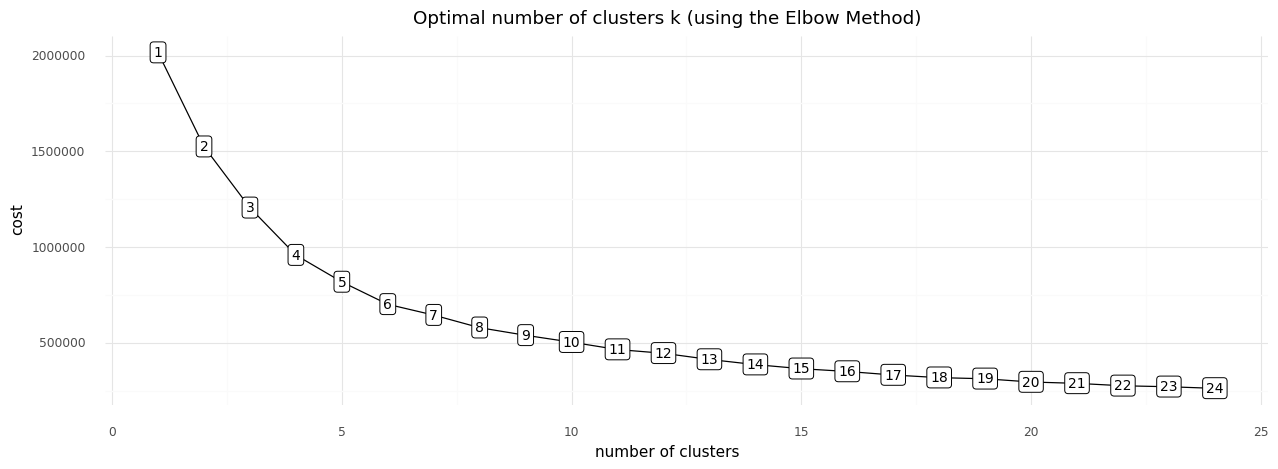

<ggplot: (8735141205182)>

In [178]:
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters_tsne) + 1), 'Cost': inertia_tsne})
plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

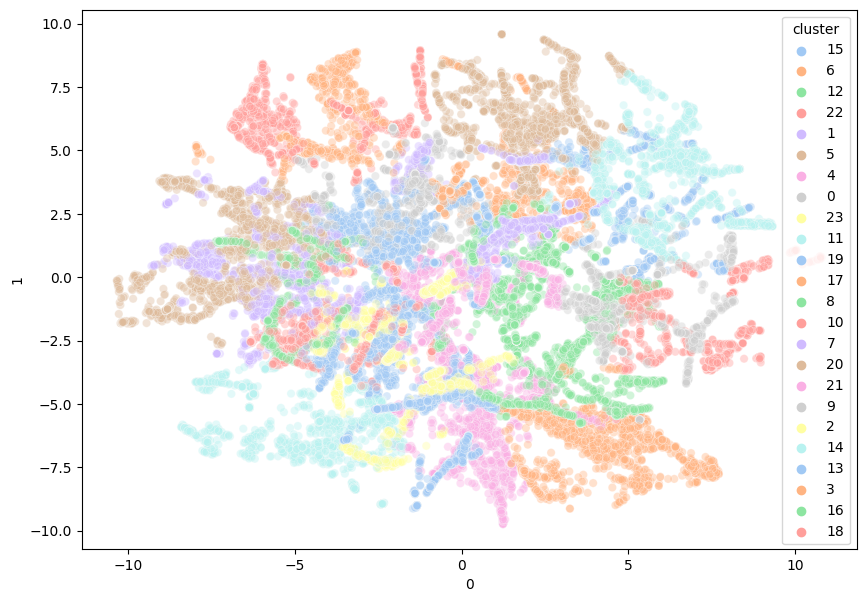

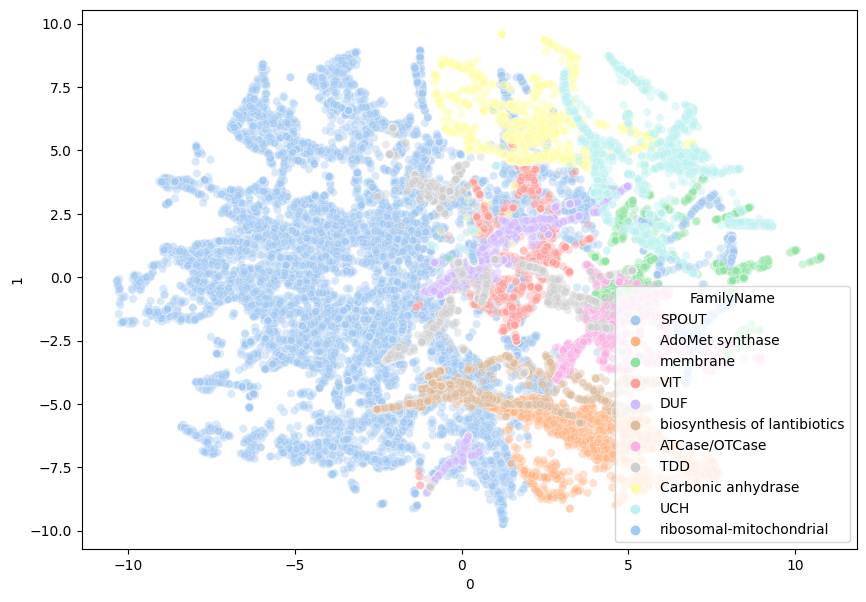

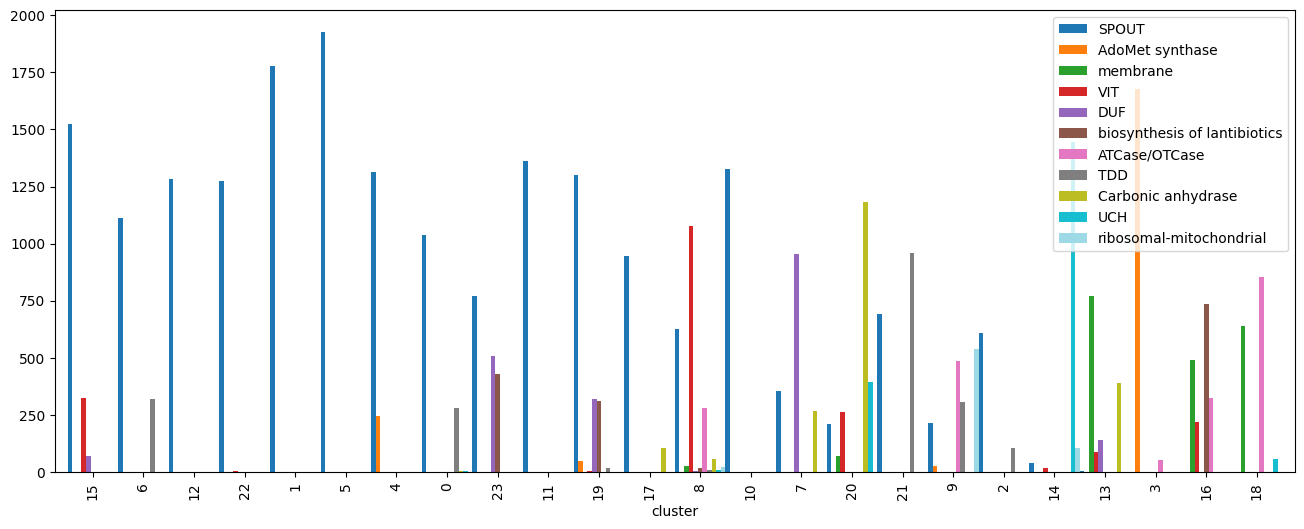

cluster  SPOUT  AdoMet synthase  membrane   VIT  DUF  \
0       15   1526                0         0   326   69   
1        6   1113                0         0     1    0   
2       12   1281                0         0     0    0   
3       22   1273                0         0     4    0   
4        1   1776                0         0     0    0   
5        5   1927                0         0     0    0   
6        4   1315              244         0     0    0   
7        0   1038                0         0     1    0   
8       23    772                0         0     0  509   
9       11   1362                0         0     0    0   
10      19   1299               50         0     5  321   
11      17    948                0         0     0    0   
12       8    624                2        27  1079    6   
13      10   1325                0         0     0    0   
14       7    353                0         0     0  954   
15      20    212                0        71   261    0   
16      21    691                0         0     0    0   
17       9    215               25         0     0    0   
18       2    609                0         0     0    0   
19      14     40                0         1    17    0   
20      13      4                0       771    86  141   
21       3      0             1679         0     0    0   
22      16      0                0       490   220    0   
23      18      0                0       640     0    0   

    biosynthesis of lantibiotics  ATCase/OTCase  TDD  Carbonic anhydrase  \
0                              0              0    0                   1   
1                              0              0  319                   0   
2                              0              0    0                   0   
3                              0              0    1                   0   
4                              0              0    0                   0   
5                              0              0    0                   0   
6                              0              0    0                   0   
7                              0              0  282                   3   
8                            427              0    0                   0   
9                              0              0    0                   0   
10                           310              0   18                   0   
11                             0              0    0                 105   
12                            18            282    7                  55   
13                             0              0    0                   0   
14                             0              0    0                 266   
15                             0              0    0                1182   
16                             0              0  960                   0   
17                             0            487  306                   0   
18                             0              0  106                   0   
19                             0              0    1                   0   
20                             0              0    0                 388   
21                             0             54    0                   0   
22                           734            324    0                   0   
23                             0            853    0                   0   

     UCH  ribosomal-mitochondrial  
0      0                        0  
1      0                        0  
2      0                        0  
3      0                        0  
4      0                        0  
5      0                        0  
6      0                        0  
7      6                        0  
8      0                        0  
9      0                        0  
10     0                        0  
11     0                        0  
12    10                       21  
13     0                        0  
14     0                        0  
15   394                        0  
16     0      

In [187]:
display_clustering_results(tsne_results_3d, computed_clusters_tsne, 23, True)
# the most mixed clusters w.r.t. family

### UMAP

In [188]:
import umap

def compute_UMAP(X_targets, n_components=2):
    umap_n = umap.UMAP(n_components=n_components, init='random', random_state=0)
    return umap_n.fit_transform(X_targets)

umap_results_5d = compute_UMAP(X_norm, n_components=5)
umap_results_5d

2023-03-05 18:21:42.607617: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 18:21:50.087582: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-05 18:21:50.088196: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-05 18:21:50.088205: W tensorfl

array([[ 6.068181 ,  2.8135521,  6.2784686,  1.8914694, 11.936428 ],
       [11.802109 ,  3.433893 ,  9.401766 ,  2.9555178,  5.7398486],
       [ 4.847021 ,  5.7674174,  0.8226819, -1.0314415,  2.278011 ],
       ...,
       [ 2.367019 ,  8.265871 , 10.378643 , 11.081745 ,  2.4222403],
       [-1.2367196,  7.1886477,  3.8888776,  7.0675263, -1.0006129],
       [ 2.3832781,  8.216758 , 10.4341755, 11.013729 ,  2.4835489]],
      dtype=float32)

In [195]:
score_umap, inertia_umap, computed_clusters_umap, computed_clusters_fitted_umap = kmeans(umap_results_5d, 40)

Start at 18:24:57.
Cluster initiation:  1 (18:24:57)
Cluster initiation:  2 (18:24:57)
Cluster initiation:  3 (18:24:57)
Cluster initiation:  4 (18:24:57)
Cluster initiation:  5 (18:24:58)
Cluster initiation:  6 (18:24:58)
Cluster initiation:  7 (18:24:58)
Cluster initiation:  8 (18:24:58)
Cluster initiation:  9 (18:24:58)
Cluster initiation: 10 (18:24:58)
Cluster initiation: 11 (18:24:58)
Cluster initiation: 12 (18:24:58)
Cluster initiation: 13 (18:24:58)
Cluster initiation: 14 (18:24:59)
Cluster initiation: 15 (18:24:59)
Cluster initiation: 16 (18:24:59)
Cluster initiation: 17 (18:24:59)
Cluster initiation: 18 (18:24:59)
Cluster initiation: 19 (18:24:59)
Cluster initiation: 20 (18:25:00)
Cluster initiation: 21 (18:25:00)
Cluster initiation: 22 (18:25:00)
Cluster initiation: 23 (18:25:00)
Cluster initiation: 24 (18:25:00)
Cluster initiation: 25 (18:25:00)
Cluster initiation: 26 (18:25:01)
Cluster initiation: 27 (18:25:01)
Cluster initiation: 28 (18:25:01)
Cluster initiation: 29 (18:25

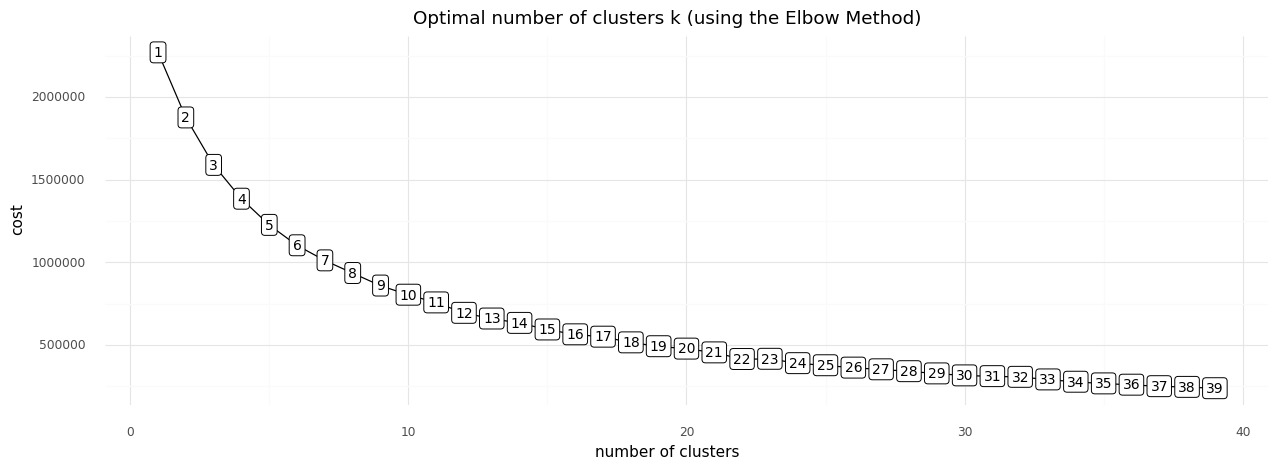

<ggplot: (8734721654047)>

In [196]:
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters_umap) + 1), 'Cost': inertia_umap})
plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

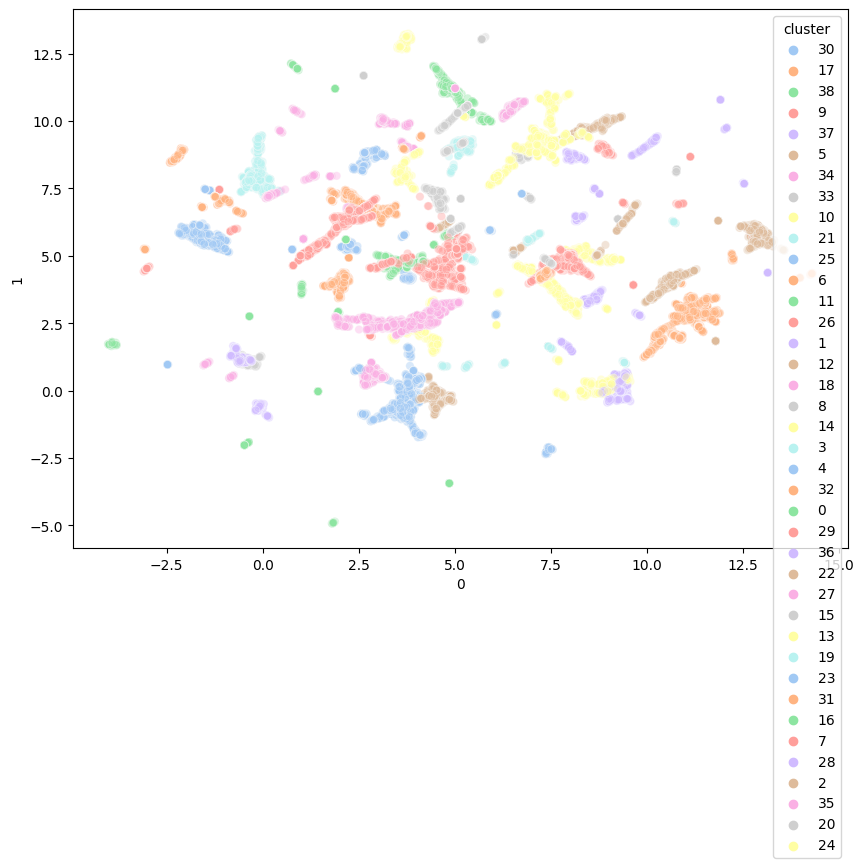

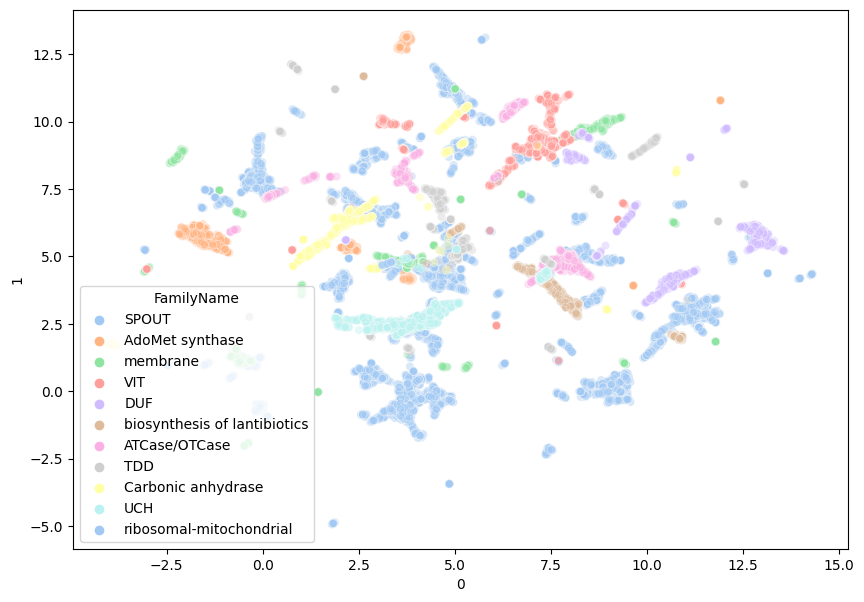

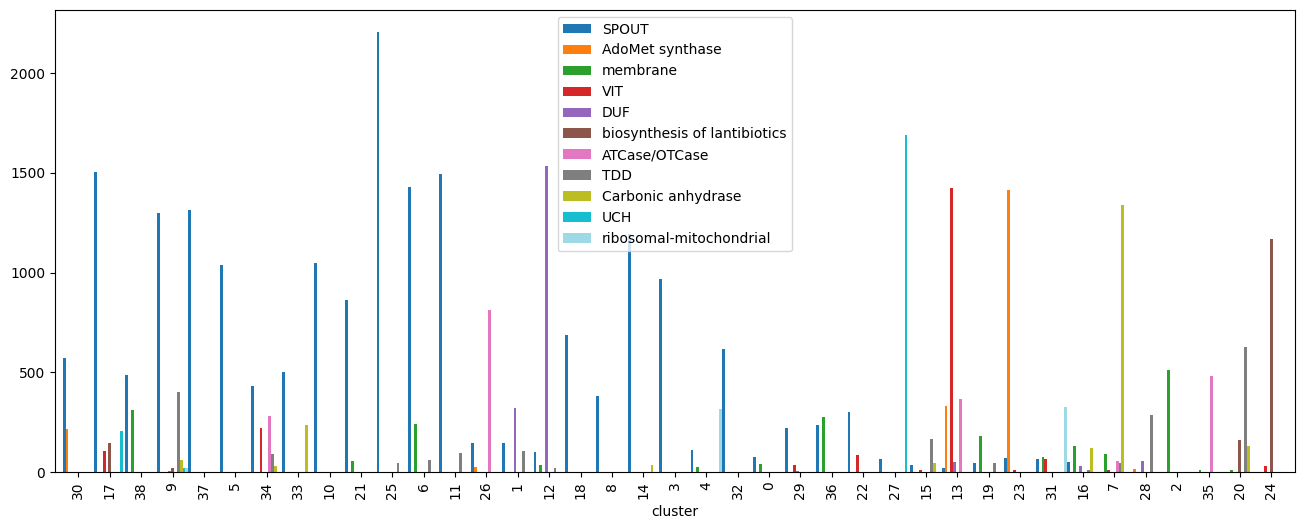

cluster  SPOUT  AdoMet synthase  membrane   VIT   DUF  \
0       30    570              213         0     0     0   
1       17   1505                0         0   104     0   
2       38    486                0       313     0     0   
3        9   1298                2         1     1     6   
4       37   1311                0         0     0     0   
5        5   1038                0         0     0     0   
6       34    433                0         0   222     0   
7       33    499                0         0     0     0   
8       10   1046                0         0     0     0   
9       21    863                0        56     0     0   
10      25   2206                0         1     0     0   
11       6   1427                0       242     0     0   
12      11   1492                0         0     0     0   
13      26    147               25         0     0     0   
14       1    143                0         0     0   321   
15      12     99                0        36     0  1533   
16      18    688                0         0     0     0   
17       8    382                0         0     0     0   
18      14   1194                0         0     2     0   
19       3    967                0         0     0     0   
20       4    109                0        24     2     0   
21      32    618                0         0     0     0   
22       0     76                0        40     0     0   
23      29    221                0         0    34     6   
24      36    238                0       275     0     0   
25      22    300                0         0    87     0   
26      27     65                0         1     1     0   
27      15     34                0         0    10     0   
28      13     19              329         1  1422    51   
29      19     43                0       179     0     0   
30      23     70             1416         0    11     0   
31      31     64                0        77    66     0   
32      16     51                0       131     0    28   
33       7      1                0        88     9     0   
34      28      0               15         0     0    55   
35       2      0                0       512     0     0   
36      35      0                0        11     0     0   
37      20      0                0        12     0     0   
38      24      0                0         0    29     0   

    biosynthesis of lantibiotics  ATCase/OTCase  TDD  Carbonic anhydrase  \
0                              0              0    0                   0   
1                            144              0    1                   0   
2                              0              0    0                   0   
3                             18              1  400                  61   
4                              0              0    0                   0   
5                              0              0    0                   0   
6                              0            281   92                  31   
7                              0              0    0                 234   
8                              0              0    0                   0   
9                              0              0    0                   0   
10                             0              0   47                   0   
11                             0              0   62                   0   
12                             0              0   93                   0   
13                             0            813    0                   0   
14                             0              0  107                   0   
15                             0              0   18                   0   
16                             0              0    0                   0   
17                             0              0    0                   0   
18                             0              0    0                  35   
19                             0              0    0                   0   
20    

In [200]:
display_clustering_results(umap_results_5d, computed_clusters_umap, 38, True)
# still too many mixed clusters w.r.t. family